In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the files from gallary to google colab
from google.colab import files
upload  = files.upload()

Saving Global_Superstore2.csv to Global_Superstore2 (1).csv


In [91]:
df = pd.read_csv('/content/Global_Superstore2 (1).csv', encoding='latin1')  # or 'ISO-8859-1'
#Cleaning the data
df.isnull().sum()
#Dropping all the missing values
df.dropna(inplace  = True)
 # Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True,errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')
df.columns = df.columns.str.replace(' ', '_')
df.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical
8,40155,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5,0.2,1906.4850,867.69,Low


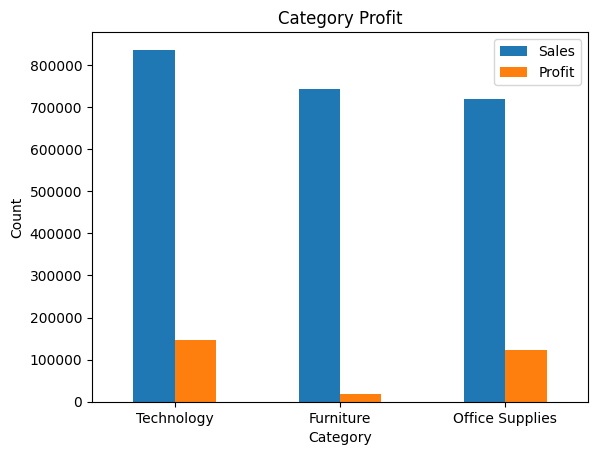

In [ ]:


# 📈 Which product categories generate the highest sales and profit?


column_profit = df.groupby('Category')[['Sales','Profit']].sum().sort_values(by ='Sales',ascending = False)

# Visualization of highest sales and profit

column_profit.plot(kind = 'bar')
plt.title('Category Profit')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=0)
plt.show()

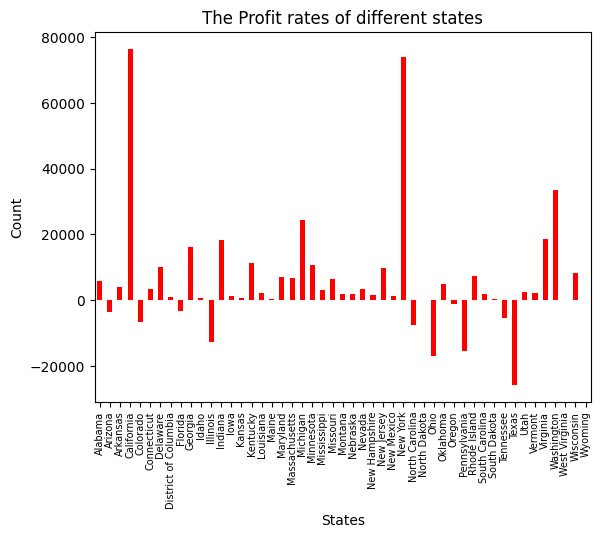

In [ ]:
# 🌍 Which countries/regions are most profitable?

Country_status = df.groupby('State')['Profit'].sum()

# Visualization of profitable states
Country_status.plot(kind = 'bar', color = 'red')
plt.title('The Profit rates of different states')
plt.xticks(rotation = 90 , fontsize = 7)
plt.xlabel('States')
plt.ylabel('Count')
plt.show()

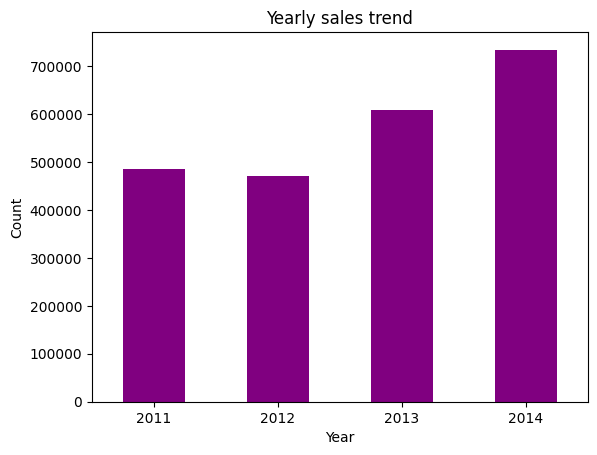

In [ ]:

# 🕒 Are there any sales trends over time (monthly/yearly)?
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

# Yearly sales trend
year_trend = df.groupby('Year')['Sales'].sum()

# Montly sales trend
month_trend = df.groupby('Month')['Sales'].sum()

# Visualization of yearly Trend
year_trend.plot(kind = 'bar',color = 'purple')
plt.title('Yearly sales trend')
plt.xticks(rotation = 0)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


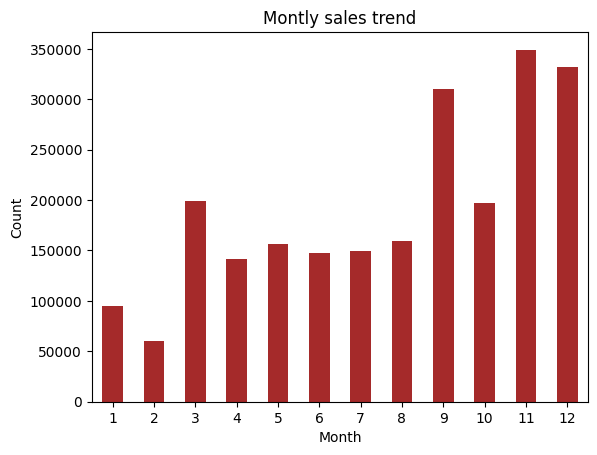

In [ ]:

# Visualization of montly Trend
month_trend.plot(kind = 'bar',color = 'brown')
plt.title('Montly sales trend')
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


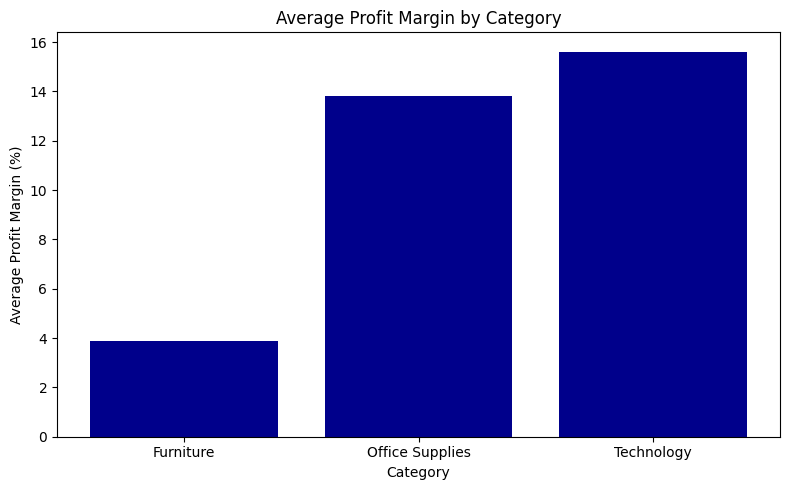

In [ ]:
# 🧾 What is the overall profit margin?
# Step 1: Create Profit_Margin column
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

# Step 2: Group by Category (or Region, Segment, etc.)
avg_margin = df.groupby('Category')['Profit_Margin'].mean()

# Step 3: Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_margin.index, avg_margin.values, color='darkblue')
plt.xlabel("Category")
plt.ylabel("Average Profit Margin (%)")
plt.title("Average Profit Margin by Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


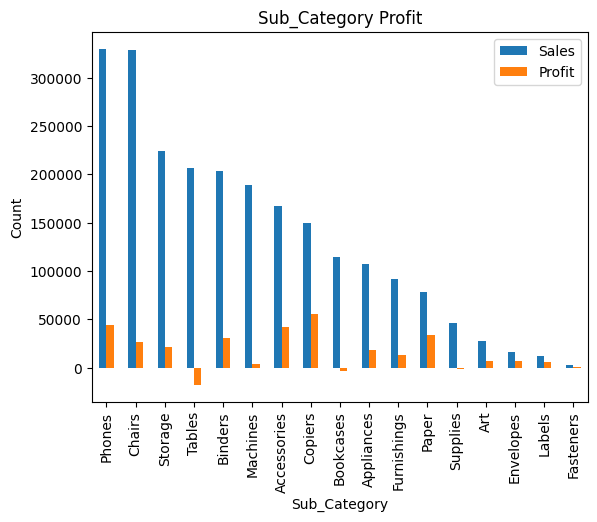

In [ ]:
# 🧺 Which products or sub-categories have the highest return (quantity sold vs profit)?
subcategory_profit = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by ='Sales',ascending = False)

# Visualization of highest sales and profit

subcategory_profit.plot(kind = 'bar')
plt.title('Sub_Category Profit')
plt.xlabel('Sub_Category')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.to_csv('Global_Store_Analysis.csv')
print('Your csv has been saved succesfully')

Your csv has been saved succesfully


In [ ]:
from google.colab import files
download = files.download('Global_Store_Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>